# **Install required packages**

In [1]:
!pip install numpy
!pip install plotly
!pip install scikit-learn

# **Imports**


In [699]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, rand_score, mutual_info_score, davies_bouldin_score, mean_squared_error
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS, cluster_optics_dbscan, SpectralClustering, MeanShift, estimate_bandwidth, Birch
import hdbscan
import scipy as scipy
import scipy.stats as stats
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture as BM
import kneed
import umap.umap_ as umap
from denseclus import DenseClus
from sklearn.model_selection import RandomizedSearchCV
import hdbscan
from sklearn.metrics import make_scorer
from s_dbw import S_Dbw, SD
pd.options.display.float_format = '{:,.5f}'.format

In [698]:
import warnings
warnings.filterwarnings('ignore')

# **URL of the dataset**
The final preprocessed dataset is in the "final_dataset" folder of my github repository

In [4]:
#outputs of the results
outputs = []

#2017 numerical
url_2017 = 'https://raw.githubusercontent.com/simoncraf/tfg/main/final_dataset/df_2017.csv'
df = pd.read_csv(url_2017)

url_2017_red = 'https://raw.githubusercontent.com/simoncraf/tfg/main/final_dataset/df_2017_red.csv'
df_red = pd.read_csv(url_2017_red)

url_2017_red_2 = 'https://raw.githubusercontent.com/simoncraf/tfg/main/final_dataset/df_2017_red_2.csv'
df = pd.read_csv(url_2017_red_2)

#2017 mixed numerical & categorical
url_2017_cat = 'https://raw.githubusercontent.com/simoncraf/tfg/main/final_dataset/df_2017_cat.csv'
df_cat = pd.read_csv(url_2017_cat)

url_2017_red_cat = 'https://raw.githubusercontent.com/simoncraf/tfg/main/final_dataset/df_2017_red_cat.csv'
df_red_cat = pd.read_csv(url_2017_red_cat)

url_2017_red_cat_2 = 'https://raw.githubusercontent.com/simoncraf/tfg/main/final_dataset/df_2017_red_cat_2.csv'
df_red_cat_2 = pd.read_csv(url_2017_red_cat_2)

df_results = []
df

,age,married,education,value_main_house,future_expenses,risk aversion,% spend future win,tot_amm_year_retirement_plans,tot_value_retirement_plans,tot_income_month,tot_loans_rest,tot_amm_acc,port_inv_val,ann_inv_income,monthly_expenses
0,73,1,2,150000.0,3,4,0,0.0,0.0,637.0,-0.0,0.0,0.0,0.0,-487.0
1,74,2,3,300000.0,3,4,0,0.0,0.0,1076.0,-0.0,30000.0,0.0,0.0,-3000.0
2,74,1,3,300000.0,3,4,99,0.0,0.0,1000.0,-0.0,5000.0,0.0,0.0,-600.0
3,65,2,6,124339.0,2,4,0,0.0,0.0,2012.0,-0.0,400.0,10000.0,250.0,-1700.0
4,72,2,6,120000.0,3,4,0,0.0,0.0,968.0,-0.0,30000.0,0.0,0.0,-1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,43,2,5,230000.0,3,4,0,0.0,0.0,2400.0,-0.0,6000.0,0.0,0.0,-1650.0
5982,28,1,6,0.0,1,4,35,0.0,0.0,0.0,-0.0,1058.0,11123.0,67.0,-1108.0
5983,45,1,6,84000.0,3,3,70,250.0,1701.0,2300.0,-31539.0,3000.0,0.0,0.0,-1222.0
5984,73,2,6,150000.0,3,4,50,0.0,0.0,1840.0,-8000.0,4200.0,4.0,0.0,-1014.0


# **Feature Scaling**

In [5]:
def scale(dataframe):
    transformer = MinMaxScaler().fit(dataframe.values)
    features = transformer.transform(dataframe.values)
    X = pd.DataFrame(features, columns = dataframe.columns, index = dataframe.index)
    return X

def standarize(dataframe):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(dataframe)
    X_normalized = normalize(X_scaled)
    X = pd.DataFrame(X_normalized, columns = dataframe.columns, index = dataframe.index)
    return X

In [6]:
X = scale(df)
X_std = standarize(df)

X

,age,married,education,value_main_house,future_expenses,risk aversion,% spend future win,tot_amm_year_retirement_plans,tot_value_retirement_plans,tot_income_month,tot_loans_rest,tot_amm_acc,port_inv_val,ann_inv_income,monthly_expenses
0,0.818182,0.0,0.142857,0.109575,1.0,1.000000,0.00,0.00000,0.000000,0.061250,1.000000,0.000000,0.000000e+00,0.000000,0.944048
1,0.833333,1.0,0.285714,0.219150,1.0,1.000000,0.00,0.00000,0.000000,0.103462,1.000000,0.037500,0.000000e+00,0.000000,0.611640
2,0.833333,0.0,0.285714,0.219150,1.0,1.000000,0.99,0.00000,0.000000,0.096154,1.000000,0.006250,0.000000e+00,0.000000,0.929101
3,0.696970,1.0,0.714286,0.090830,0.5,1.000000,0.00,0.00000,0.000000,0.193462,1.000000,0.000500,6.097561e-04,0.000392,0.783598
4,0.803030,1.0,0.714286,0.087660,1.0,1.000000,0.00,0.00000,0.000000,0.093077,1.000000,0.037500,0.000000e+00,0.000000,0.876190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0.363636,1.0,0.571429,0.168015,1.0,1.000000,0.00,0.00000,0.000000,0.230769,1.000000,0.007500,0.000000e+00,0.000000,0.790212
5982,0.136364,0.0,0.714286,0.000000,0.0,1.000000,0.35,0.00000,0.000000,0.000000,1.000000,0.001323,6.782317e-04,0.000105,0.861905
5983,0.393939,0.0,0.714286,0.061362,1.0,0.666667,0.70,0.04902,0.011571,0.221154,0.940492,0.003750,0.000000e+00,0.000000,0.846825
5984,0.818182,1.0,0.714286,0.109575,1.0,1.000000,0.50,0.00000,0.000000,0.176923,0.984906,0.005250,2.439024e-07,0.000000,0.874339


# **Data Visualization**

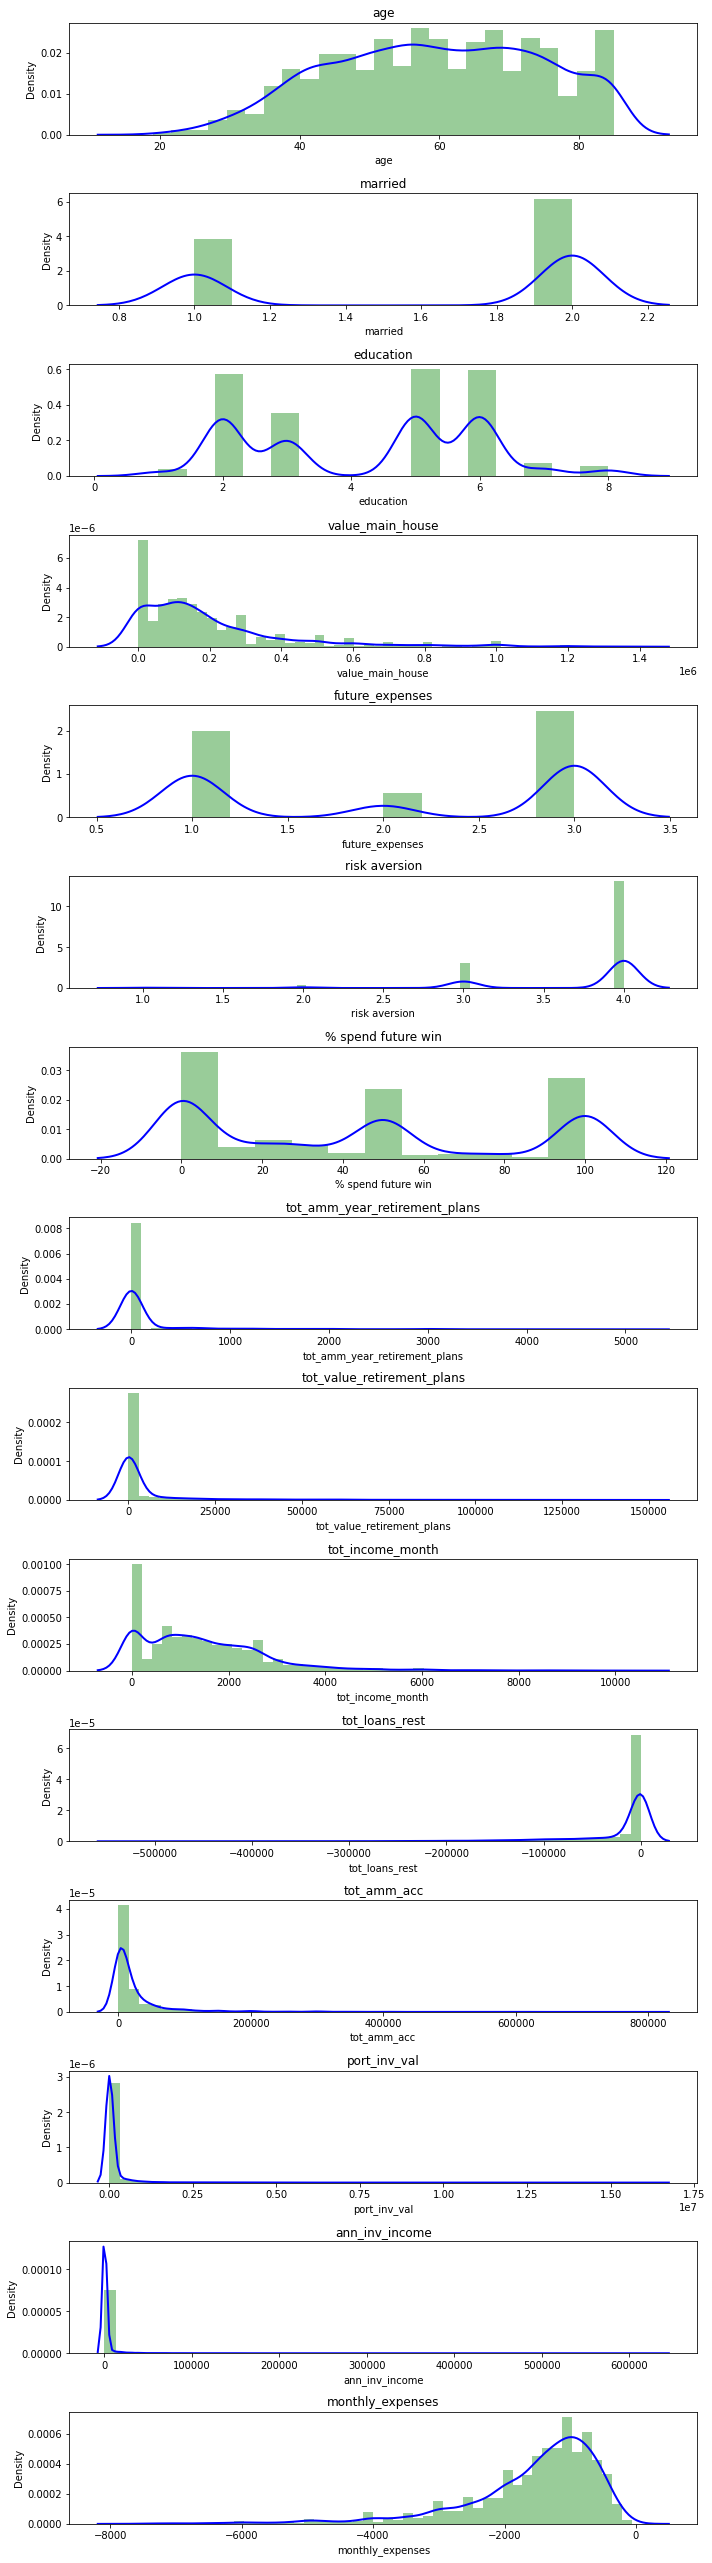

In [7]:
plt.figure(figsize = (10, 40))
for i in range(len(df.columns)):
    ax = plt.subplot(17, 1, i + 1)
    #--plot hist and kde in one plot; color, linewidth, label, 
    sns.distplot(df[df.columns[i]], kde_kws = {'color': 'b', 'lw': 2, 'label': 'KED'}, hist_kws={'color': 'g'})
    plt.title(df.columns[i])

plt.tight_layout()

# **Utility**

In [8]:
def print_general_output(result,prediction):
    new_result = result.copy()
    new_result['cluster'] = prediction
    
    noise = 100 - new_result.loc[new_result['cluster'] != -1].shape[0] * 100 / df.shape[0]
    print('Noise: {:.2f} %'.format(noise))
    
    output = new_result.groupby('cluster').mean()    
    output[output.columns].plot.bar(rot=0, figsize=(18,10))
    axes = output.plot.bar(rot=0, subplots=True, figsize=(18,100))
    axes[1].legend(loc=2)
    plt.show()
    
def plot_pca_variance(dataset):
    pca = PCA()
    pca.fit(dataset)
    sn.color_palette("YlOrBr", as_cmap=True)
    plt.figure(figsize=(15,8))
    exp_var = pd.Series(pca.explained_variance_ratio_) 
    exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

    # Calculate the amount of variance explained added by each additional component
    total = 0
    var_ls = []
    for x in exp_var:
        total = total+x
        var_ls.append(total)

    pd.Series(var_ls).plot(marker="o", alpha=0.7) #plot line chart of increasing variances
    plt.xlabel("Principle Components", fontsize="x-large")
    plt.ylabel("Percentage Variance Explained", fontsize="x-large")
    plt.title("Screen Plot", fontsize="xx-large")
    plt.show();
    
    
def elbow(dataset,method = 'kmeans',k = range(2,15)):

    inertia = []
    
    if(method == 'kmeans'):
        for num_clusters in k :
            kmeans = KMeans(n_clusters=num_clusters)
            kmeans.fit(dataset)
            inertia.append(kmeans.inertia_)

    kneedle = kneed.KneeLocator(k,inertia,S=1.0, curve="convex", direction="decreasing",interp_method = 'polynomial')
    x_val = kneedle.knee
    kneedle.plot_knee()
    plt.plot(k,inertia,'bx-',color = 'r',label = 'Dataset 1')
    plt.xlabel('Clusters K') 
    plt.ylabel('Sum of squared distances / Inertia') 
    plt.title('Elbow Method For Optimal k')
    plt.legend()
    plt.show()
    
def silhouette(dataset,method = 'kmeans',k = range(2,15)):
    silhouette_avg = []
    
    if(method == 'kmeans'):
        for num_clusters in k:
            kmeans = KMeans(n_clusters=num_clusters)
            kmeans.fit(dataset)
            cluster_labels = kmeans.labels_
            silhouette_avg.append(silhouette_score(dataset, cluster_labels))
        
    
    plt.plot(k,silhouette_avg,'bx-',color = 'r',label = 'Dataset 1')
    plt.xlabel('Clusters K') 
    plt.ylabel('Silhouette score') 
    plt.title('Silhouette Analysis For Optimal k')
    plt.legend()
    plt.show()
    
    
def calinski_harabasz(dataset,method = 'kmeans',k = range(2,15)):
    ch = []
    
    if(method == 'kmeans'):
        for num_clusters in k:
            kmeans = KMeans(n_clusters=num_clusters)
            kmeans.fit(dataset)
            cluster_labels = kmeans.labels_
            ch.append(calinski_harabasz_score(dataset, cluster_labels))
        
    plt.plot(k,ch,'bx-',color = 'r',label = 'Dataset 1')
    plt.xlabel('Clusters K') 
    plt.ylabel('Calinski Harabasz score') 
    plt.title('Calinski Harabasz Analysis For Optimal k')
    plt.legend()
    plt.show()
    

def davies_score(dataset,method = 'kmeans',k = range(2,15)):
    ds = []
    if(method == 'kmeans'):
        for num_clusters in k:
            kmeans = KMeans(n_clusters=num_clusters)
            kmeans.fit(dataset)
            cluster_labels = kmeans.labels_
            ds.append(davies_bouldin_score(dataset, cluster_labels))

    plt.plot(k,ds,'bx-',color = 'r',label = 'Dataset 1')
    plt.xlabel('Clusters K') 
    plt.ylabel('Davies Bouldin score') 
    plt.title('Davies Bouldin Analysis For Optimal k')
    plt.legend()
    plt.show()
    
def sdbw_score(dataset,method = 'kmeans',k = range(2,15)):
    sdbw = []
    if(method == 'kmeans'):
        for num_clusters in k:
            kmeans = KMeans(n_clusters=num_clusters)
            kmeans.fit(dataset)
            cluster_labels = kmeans.labels_
            sdbw.append(S_Dbw(np.array(dataset),np.array(cluster_labels)))
            
    plt.plot(k,sdbw,'bx-',color = 'r',label = 'Dataset 1')
    plt.xlabel('Clusters K') 
    plt.ylabel('S_Dbw score') 
    plt.title('S_Dbw Analysis For Optimal k')
    plt.legend()
    plt.show()
    
def k_means_analysis(dataset,k = range(2,15)):
    elbow(dataset)
    silhouette(dataset)
    calinski_harabasz(dataset)
    davies_score(dataset)
    sdbw_score(dataset)
    

# **Dimensionality Reduction**

# **t-SNE**

In [9]:
def plot_tsne(dataset,color = 'DarkBlue',c_map = 'tab20'):
    X_embedded = TSNE(n_components=2,init='pca', method = 'barnes_hut').fit_transform(dataset)
    plt.scatter(X_embedded[:,0],X_embedded[:,1],c = color, s = 10, cmap = c_map)

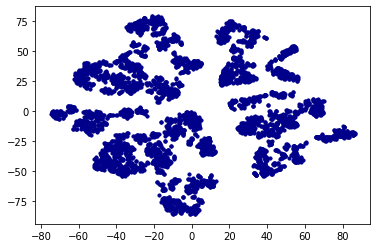

In [10]:
plot_tsne(X)

# **UMAP**

In [11]:
import umap.plot as ump
def plot_umap(dataset,labels = [], n = 15):
    mapper = umap.UMAP(n_neighbors = n).fit(dataset.values)
    if(len(labels) == 0):
        ump.points(mapper,theme='fire')
    else:
        ump.points(mapper,labels,theme='fire')

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


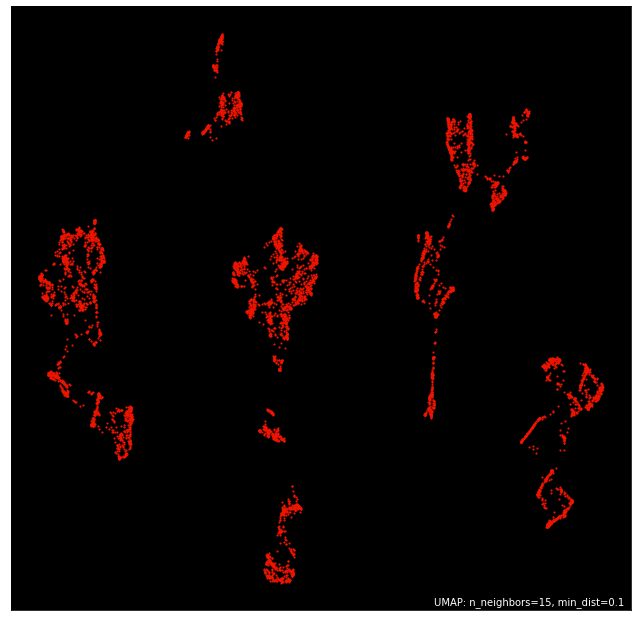

In [12]:
plot_umap(X)

# **Numerical Data**

# **K-Means**

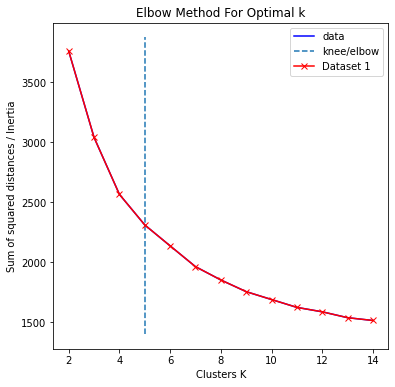

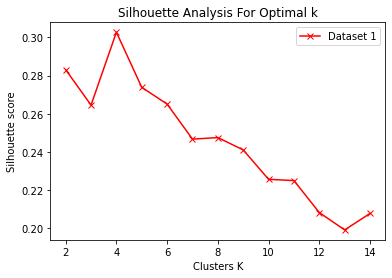

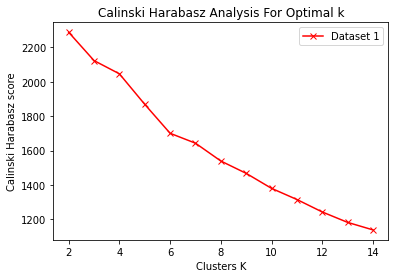

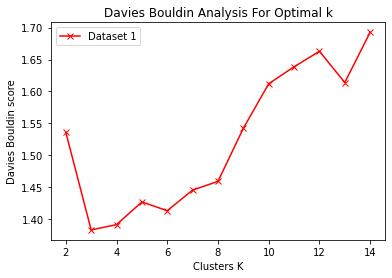

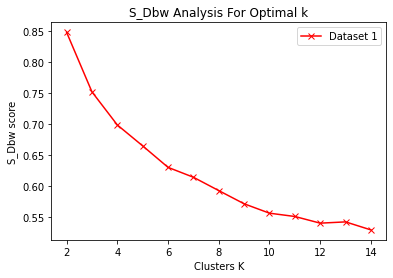

In [13]:
k_means_analysis(X)

The Elbow analysis shows that the best number of clusters is 5 but in the Silhouette analysis 4 clusters is the optimal number. In the other tests k = 5 clusters is the best option but with very similar scores to k = 4 so we will try bouth options.

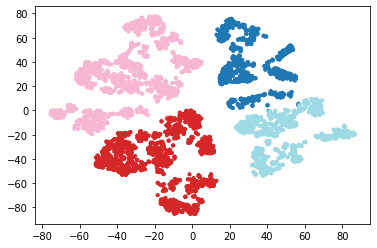

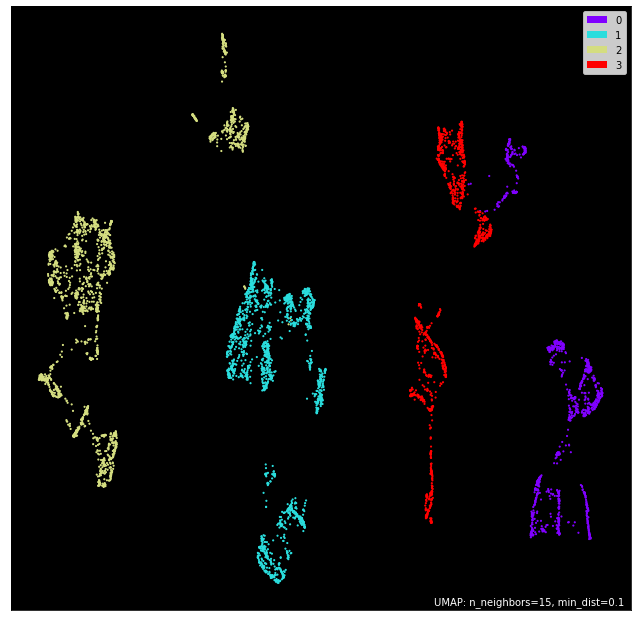

In [14]:
k = 4

kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)

plot_tsne(X,y_pred,c_map = 'tab20')
plot_umap(X,y_pred)
df_kmeans_4 = X.copy()
df_kmeans_4['cluster'] = y_pred
df_results.append(df_kmeans_4)

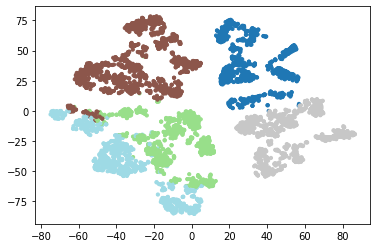

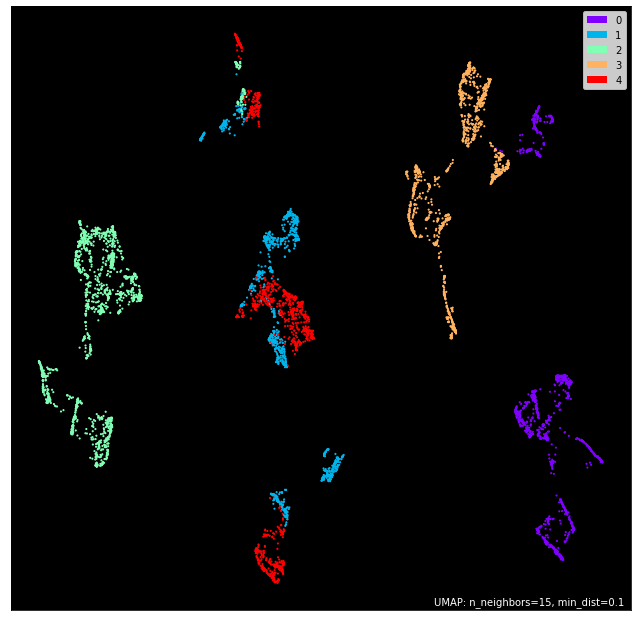

In [15]:
k = 5

kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)

plot_tsne(X,y_pred,c_map = 'tab20')
plot_umap(X,y_pred)
df_kmeans_5 = X.copy()
df_kmeans_5['cluster'] = y_pred
df_results.append(df_kmeans_5)

# **DBSCAN**

In [16]:
def find_eps(dataset,n,zoom = False):
    
    neighbors = NearestNeighbors(n_neighbors = n)
    neighbors_fit = neighbors.fit(dataset)
    distances, indices = neighbors_fit.kneighbors(dataset)

    distances = np.sort(distances[:,n-1], axis=0)
    kneedle = kneed.KneeLocator(np.arange(len(distances)),distances,S=1.0, curve="convex", direction="increasing",interp_method = 'polynomial')
    x_val = kneedle.knee
    eps_values = (round(distances[x_val],3))
    
    
    #print(round(distances[x_val],3)) 
    if zoom:
        plt.axis(zoom)
    kneedle.plot_knee()
    plt.plot(distances)
    
    return eps_values

In [17]:
def silhouette_dbscan(dataset,val,eps):
    
    clusterer = DBSCAN(eps = eps, min_samples = val)
    clusterer.fit(dataset)
    cluster_labels = clusterer.labels_
    score = silhouette_score(dataset, cluster_labels)
    
    print('The silhouette score is {s}, achieved with {m} minimum samples and {e} eps'.format(s = round(score,3), m = val, e = eps))
    return score

The silhouette score is 0.137, achieved with 15 minimum samples and 0.466 eps


0.13670070956849736

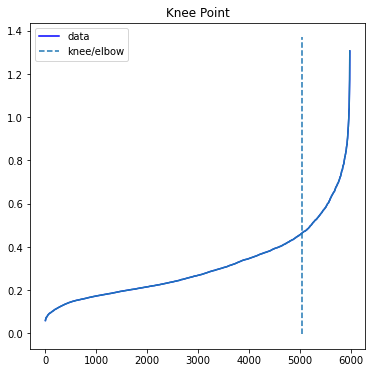

In [18]:
n = 15
eps = find_eps(X,n)
silhouette_dbscan(X,n,eps)

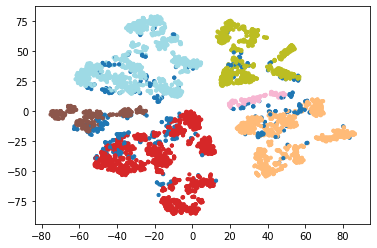

In [19]:
clusterer = DBSCAN(eps = eps, min_samples = n, n_jobs = -1)
clusterer.fit(X)
y_pred = clusterer.labels_
plot_tsne(X, y_pred, c_map = 'tab20')
df_dbscan = X.copy()
df_dbscan['cluster'] = y_pred
df_results.append(df_dbscan)

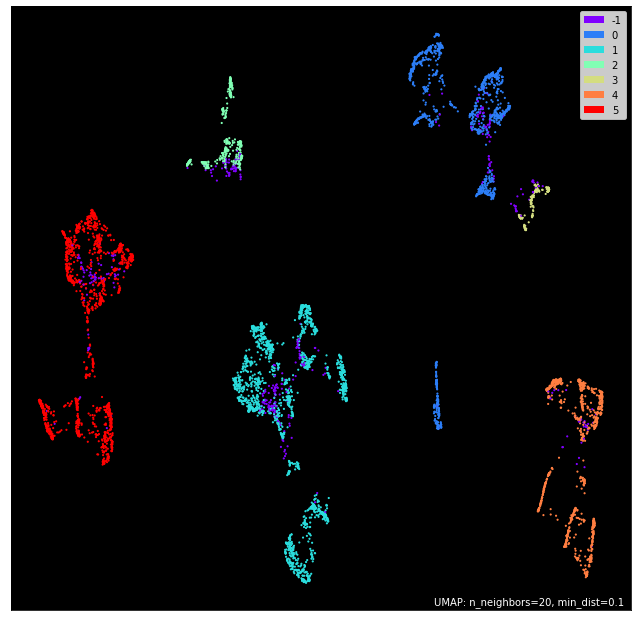

In [20]:
plot_umap(X,y_pred, n = 20)

# **OPTICS**

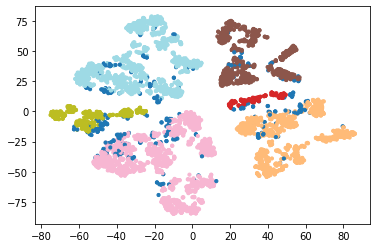

In [21]:
clust = OPTICS(min_samples = 16, xi=0.1)
clust.fit(X)
y_pred = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
plot_tsne(X, y_pred)
df_optics = X.copy()
df_optics['cluster'] = y_pred
df_results.append(df_optics)

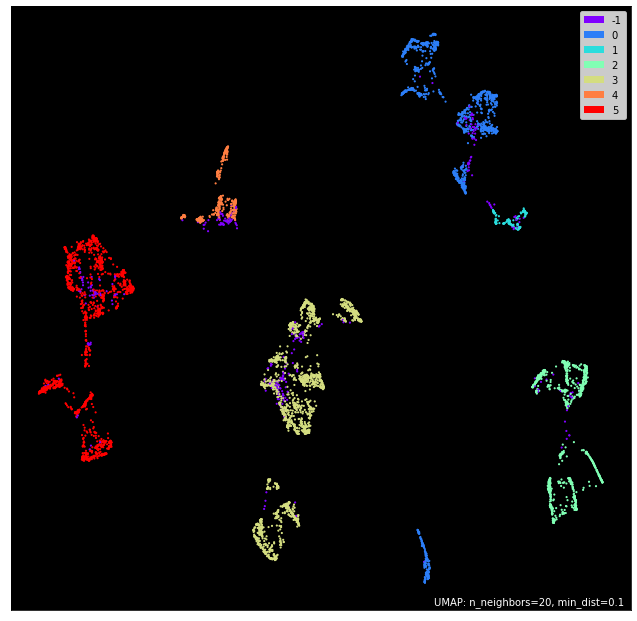

In [22]:
plot_umap(X,y_pred, n = 20)

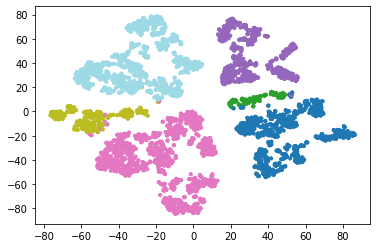

In [23]:
from sklearn.neighbors import KNeighborsClassifier

noise = df_optics.loc[df_optics['cluster'] == -1]
noise = noise.drop(['cluster'], axis = 1)

aux = df_optics.drop(noise.index, axis = 0)
aux_clusters = aux['cluster']
aux = aux.drop(['cluster'], axis=1)

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(aux,aux_clusters)

predictions = knn.predict(noise)
noise['cluster'] = predictions

df_optics_2 = df_optics.copy()
df_optics_2.loc[df_optics_2['cluster'] == -1] = noise

y_pred = df_optics_2['cluster']
plot_tsne(df_optics_2.loc[:, df_optics_2.columns != 'cluster'],y_pred)
df_results.append(df_optics_2)

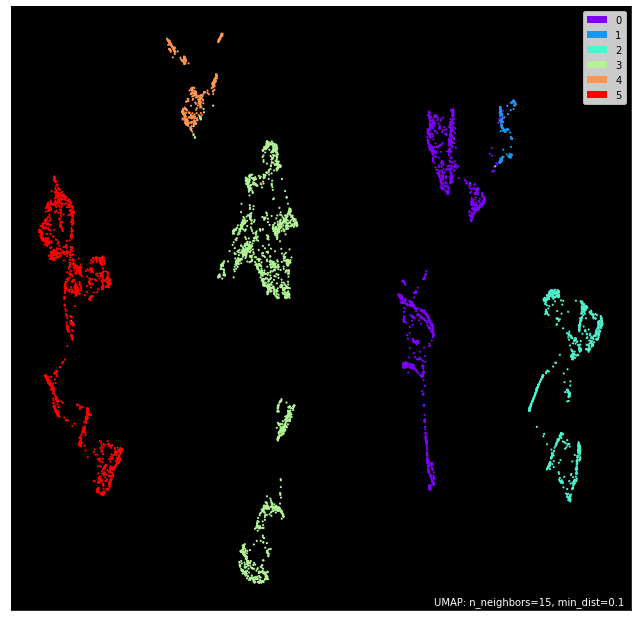

In [24]:
plot_umap(df_optics_2.loc[:, df_optics_2.columns != 'cluster'],df_optics_2['cluster'])

# **DENSECLUS (HDBSCAN)**

# **Agglomerative Clustering**

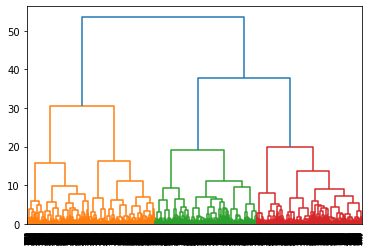

In [25]:
dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))

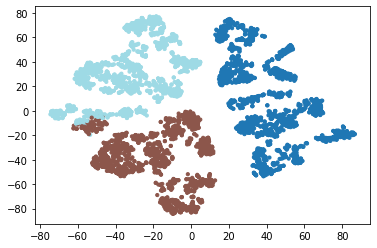

In [26]:
y_pred = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(X)
plot_tsne(X,y_pred)
df_ac_3 = X.copy()
df_ac_3['cluster'] = y_pred
df_results.append(df_ac_3)

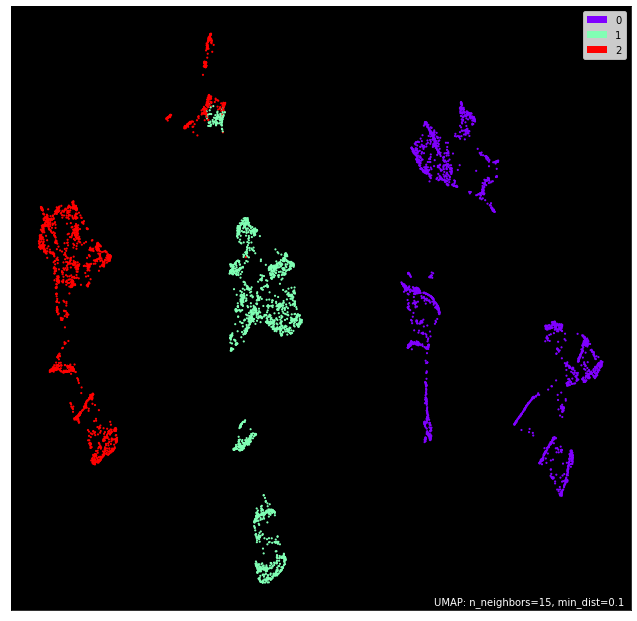

In [27]:
plot_umap(df_ac_3.loc[:, df_ac_3.columns != 'cluster'],df_ac_3['cluster'])

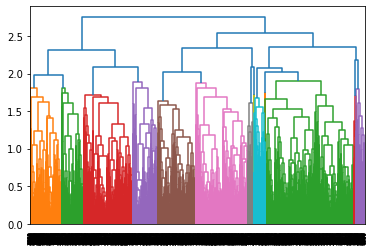

In [28]:
dendrogram = sch.dendrogram(sch.linkage(X,method = 'complete'))

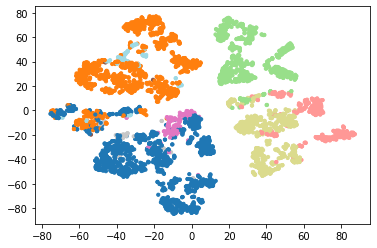

In [29]:
y_pred = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'complete').fit_predict(X)
plot_tsne(X,y_pred)
df_ac_9 = X.copy()
df_ac_9['cluster'] = y_pred
df_results.append(df_ac_9)

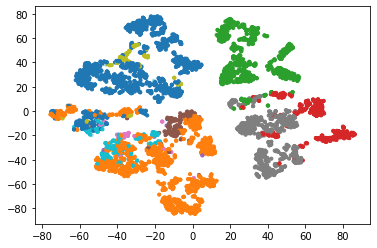

In [30]:
y_pred = AgglomerativeClustering(n_clusters = 11, affinity = 'euclidean', linkage = 'complete').fit_predict(X)
plot_tsne(X,y_pred)
df_ac_11 = X.copy()
df_ac_11['cluster'] = y_pred
df_results.append(df_ac_11)

# **Gaussian Mixtures**

In [31]:
def get_info(dataset):
    bic_score = []
    aic_score = []

    for i in range(1,15):
        gm = GaussianMixture(n_components = i, n_init = 10)
        gm.fit(dataset)
        bic_score.append(gm.bic(dataset))
        aic_score.append(gm.aic(dataset))

    plt.plot(range(1,15),bic_score,'bx-',color = 'r',label = 'BIC')
    plt.plot(range(1,15),aic_score,'bx-',color = 'b', label = 'AIC')
    plt.xlabel('Number of Clusters') 
    plt.ylabel('Information Criterion') 
    plt.title('Finding Optimal Number of Clusters')
    plt.legend()
    plt.show()

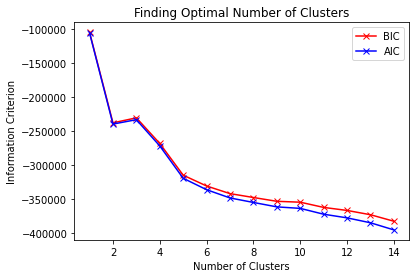

In [32]:
get_info(X)

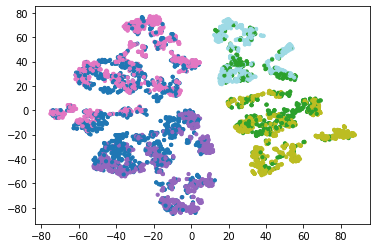

In [33]:
gm = GaussianMixture(n_components = 6, n_init = 10)
y_pred = gm.fit_predict(X)
plot_tsne(X,y_pred)
df_gm = X.copy()
df_gm['cluster'] = y_pred
df_results.append(df_gm)

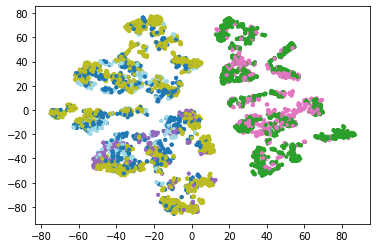

In [34]:
bgm = BM(n_components=6,n_init=10)
y_pred = bgm.fit_predict(X)
plot_tsne(X,y_pred)
df_bgm = X.copy()
df_bgm['cluster'] = y_pred
df_results.append(df_bgm)

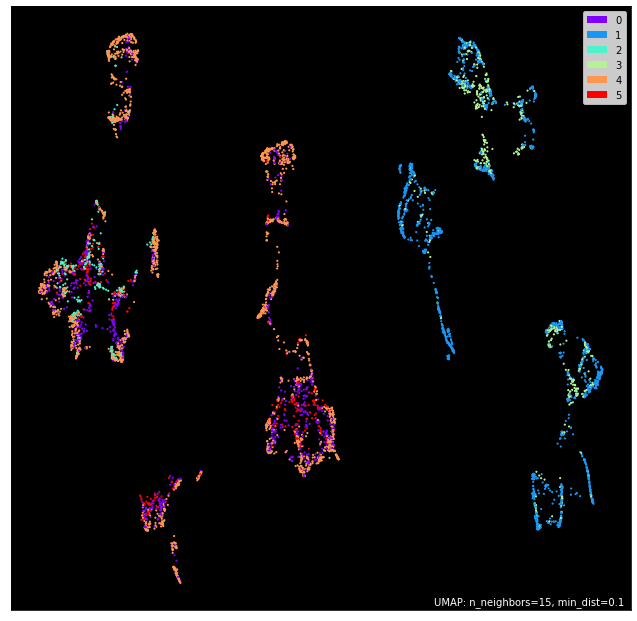

In [35]:
plot_umap(df_bgm.loc[:, df_bgm.columns != 'cluster'],df_bgm['cluster'])

# **MeanShift**

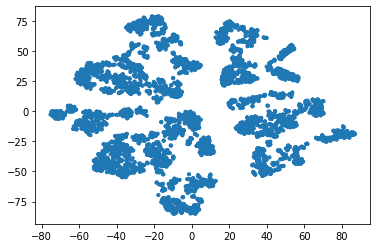

In [36]:
y_pred = MeanShift().fit_predict(X)
plot_tsne(X,y_pred)
df_ms = X.copy()
df_ms['cluster'] = y_pred
df_results.append(df_ms)

# **BIRCH**

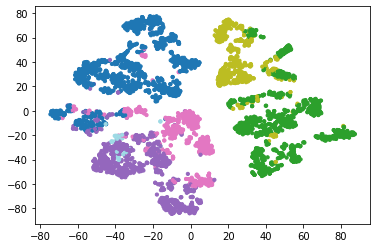

In [37]:
brc = Birch(n_clusters=8)
brc.fit(X)
y_pred = brc.predict(X)
plot_tsne(X,y_pred)
df_brc = X.copy()
df_brc['cluster'] = y_pred
df_results.append(df_brc)

# **Spectral Clustering**

In [686]:
def spectral_silhouette(dataset):    
    range_n_clusters = range(2,15)
    silhouette_rbf = []
    silhouette_nn = []

    for num_clusters in range_n_clusters:
        spectral_model_rbf = SpectralClustering(n_clusters = num_clusters, affinity ='rbf')
        spectral_model_nn = SpectralClustering(n_clusters = num_clusters, affinity ='nearest_neighbors')
        y_dataset_rbf = spectral_model_rbf.fit_predict(dataset)
        y_dataset_nn = spectral_model_nn.fit_predict(dataset)
        silhouette_rbf.append(silhouette_score(dataset, y_dataset_rbf))
        silhouette_nn.append(silhouette_score(dataset, y_dataset_nn))

    plt.plot(range_n_clusters,silhouette_rbf,'bx-',color = 'r',label = 'rbf')
    plt.plot(range_n_clusters,silhouette_nn,'bx-',color = 'b', label = 'nearest_neighbors')

    plt.xlabel('Clusters') 
    plt.ylabel('Silhouette score') 
    plt.title('Silhouette analysis For Optimal k')
    plt.legend()
    plt.show()

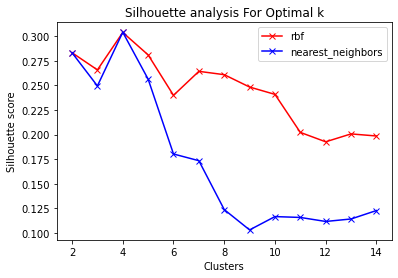

In [687]:
spectral_silhouette(X)

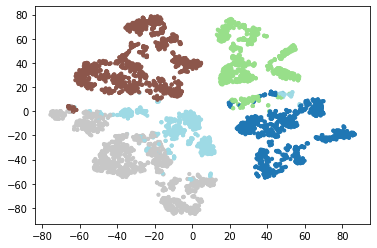

In [40]:
spectral_model_rbf = SpectralClustering(n_clusters = 5, affinity ='rbf')
y_pred = spectral_model_rbf.fit_predict(X)
plot_tsne(X,y_pred)
df_rbf_5 = X.copy()
df_rbf_5['cluster'] = y_pred
df_results.append(df_rbf_5)

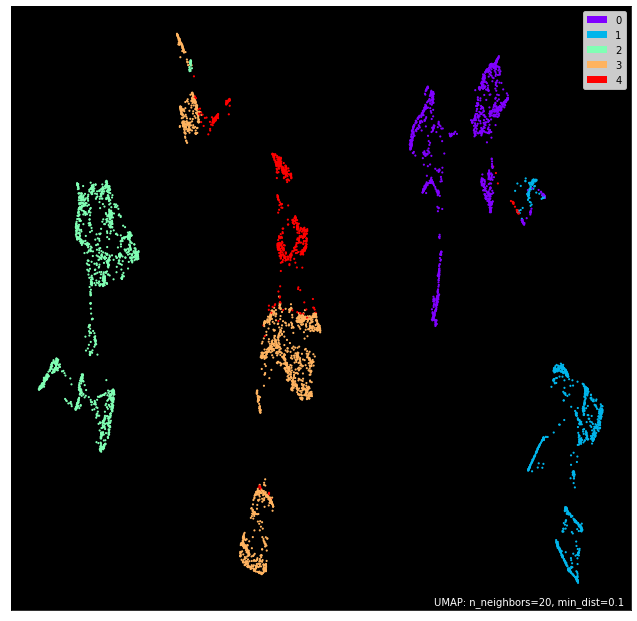

In [41]:
plot_umap(X,y_pred, n = 20)

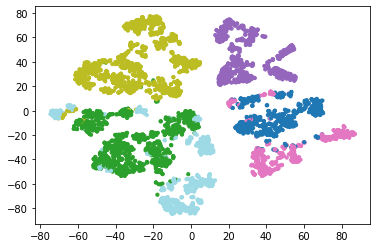

In [42]:
spectral_model_rbf = SpectralClustering(n_clusters = 6, affinity ='rbf')
y_pred = spectral_model_rbf.fit_predict(X)
plot_tsne(X,y_pred)
df_rbf_6 = X.copy()
df_rbf_6['cluster'] = y_pred
df_results.append(df_rbf_6)

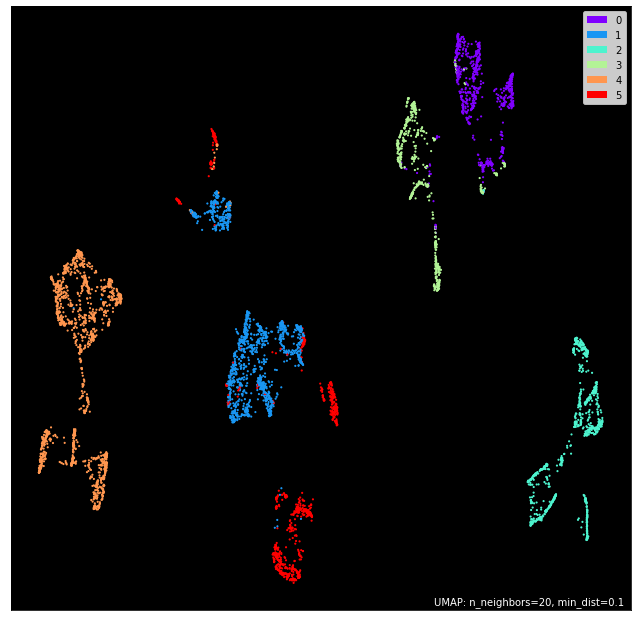

In [43]:
plot_umap(X,y_pred, n = 20)

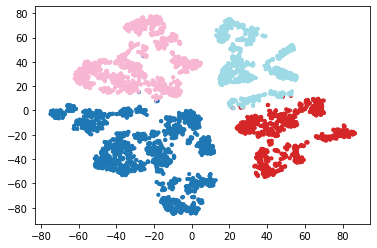

In [44]:
spectral_model_nn = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors')
y_pred = spectral_model_nn.fit_predict(X)
plot_tsne(X,y_pred)
df_nn_4 = X.copy()
df_nn_4['cluster'] = y_pred
df_results.append(df_nn_4)

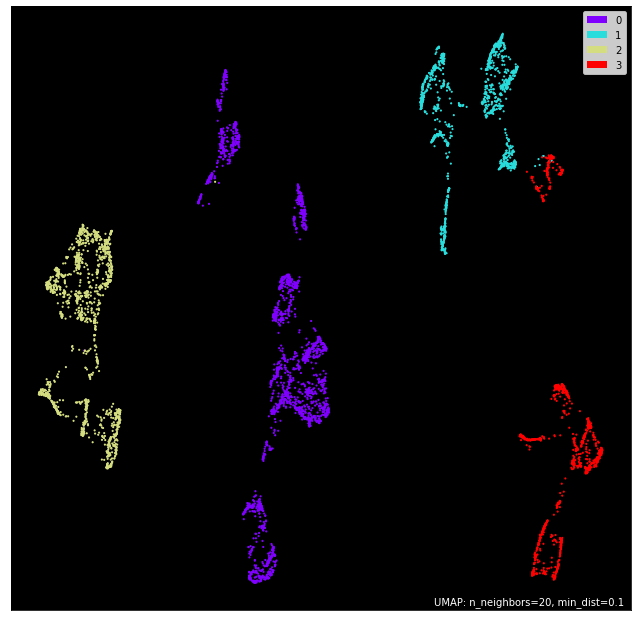

In [45]:
plot_umap(X,y_pred, n = 20)

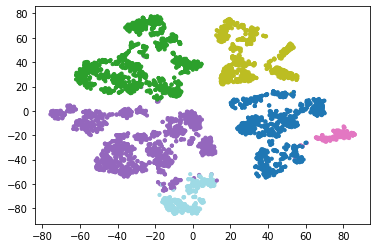

In [46]:
spectral_model_nn = SpectralClustering(n_clusters = 6, affinity ='nearest_neighbors')
y_pred = spectral_model_nn.fit_predict(X)
plot_tsne(X,y_pred)
df_nn_6 = X.copy()
df_nn_6['cluster'] = y_pred
df_results.append(df_nn_6)

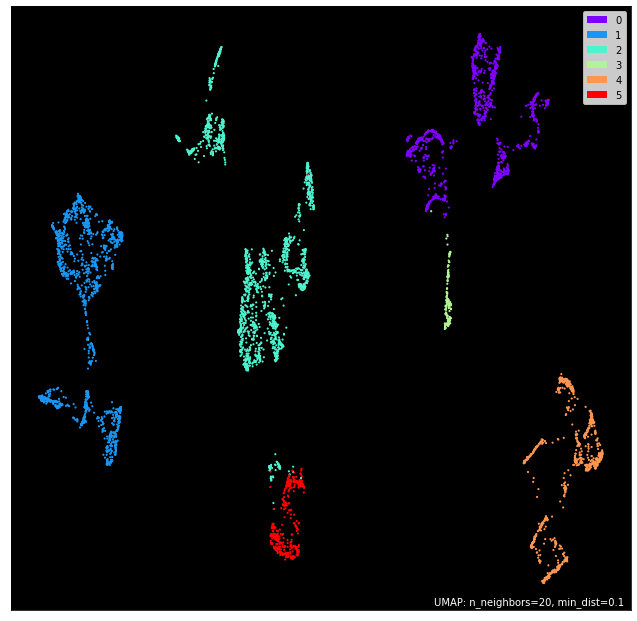

In [47]:
plot_umap(X,y_pred, n = 20)

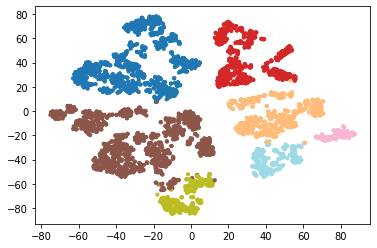

In [48]:
spectral_model_nn = SpectralClustering(n_clusters = 7, affinity ='nearest_neighbors')
y_pred = spectral_model_nn.fit_predict(X)
plot_tsne(X,y_pred)
df_nn_7 = X.copy()
df_nn_7['cluster'] = y_pred
df_results.append(df_nn_7)

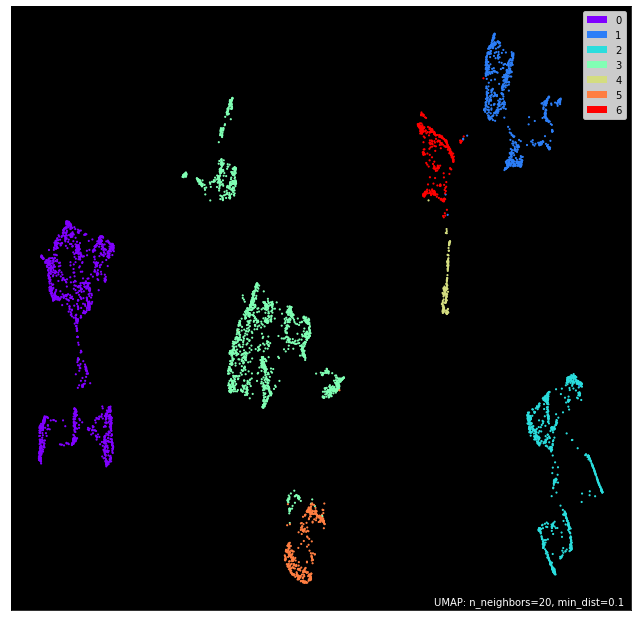

In [49]:
plot_umap(X,y_pred, n = 20)

# **Metrics Evaluation**

In [50]:
silhouette = []
calinski_harabasz = []
davies_score = []
sdbw_score = []

for d in df_results:
    data = d.loc[:, d.columns != 'cluster']
    labels = d['cluster']
    try:
        sil = silhouette_score(data,labels)
        silhouette.append(round(sil,5))
    except:
        silhouette.append(np.NaN)
        
    try:
        ch = calinski_harabasz_score(data,labels)
        calinski_harabasz.append(ch)
        
    except:
        calinski_harabasz.append(np.NaN)
        
    try:
        db = davies_bouldin_score(data,labels)
        davies_score.append(db)
        
    except:
        davies_score.append(np.NaN)
        
    try:
        sdbw = S_Dbw(np.array(data),np.array(labels))
        sdbw_score.append(sdbw)
        
    except:
        sdbw_score.append(np.NaN)

In [51]:
clusterers = ['K_means_4','K_means_5','DBSCAN','OPTICS','OPTICS_2','Agglomerative_3','Agglomerative_9','Agglomerative_11',
             'Gaussian_Mixtures','BGM','MeanShift','BIRCH','Spectral_rbf_5','Spectral_rbf_6','Spectral_nn_4','Spectral_nn_6','Spectral_nn_7']

metrics = pd.DataFrame(data = {'Name':clusterers, 'Silhouette': silhouette,'Calinski_Harabasz':calinski_harabasz,
                               'Davies Bouldin':davies_score,'S_Dbw':sdbw_score})
sil_index = metrics.sort_values(by = 'Silhouette', ascending = False).index
ch_index = metrics.sort_values(by = 'Calinski_Harabasz', ascending = False).index
db_index = metrics.sort_values(by = 'Davies Bouldin', ascending = True).index
sdbw_index = metrics.sort_values(by = 'S_Dbw', ascending = True).index

metrics[['sil_rank','ch_rank','db_rank','S_Dbw_rank']] = 0

for idx, i in enumerate(sil_index):
    metrics.iloc[i,5] = idx
    
for idx, i in enumerate(ch_index):
    metrics.iloc[i,6] = idx
    
for idx, i in enumerate(db_index):
    metrics.iloc[i,7] = idx
    
for idx, i in enumerate(sdbw_index):
    metrics.iloc[i,8] = idx
    
metrics['rank'] = metrics[['sil_rank','ch_rank','db_rank','S_Dbw_rank']].mean(axis = 1).astype(int)
metrics = metrics.sort_values(by = 'rank')
metrics

,Name,Silhouette,Calinski_Harabasz,Davies Bouldin,S_Dbw,sil_rank,ch_rank,db_rank,S_Dbw_rank,rank
14,Spectral_nn_4,0.30386,2041.034662,1.373178,0.694383,0,2,0,8,2
0,K_means_4,0.30267,2046.672492,1.391390,0.698569,1,1,3,9,3
1,K_means_5,0.27383,1869.196742,1.426973,0.664849,3,3,4,3,3
12,Spectral_rbf_5,0.28086,1838.501879,1.389968,0.670569,2,4,2,4,3
5,Agglomerative_3,0.26363,2118.094635,1.389451,0.752638,4,0,1,14,4
13,Spectral_rbf_6,0.21359,1469.256625,1.903640,0.656927,6,5,10,2,5
15,Spectral_nn_6,0.18022,1402.420570,1.517941,0.567674,8,6,5,1,5
11,BIRCH,0.21841,1267.868566,1.617473,0.687343,5,8,6,6,6
16,Spectral_nn_7,0.17342,1247.321727,1.626961,0.549781,10,9,7,0,6
6,Agglomerative_9,0.18275,931.359452,1.717286,0.687593,7,13,8,7,8


In [52]:
metrics[['Name','S_Dbw_rank']].sort_values(by = 'S_Dbw_rank')

,Name,S_Dbw_rank
16,Spectral_nn_7,0
15,Spectral_nn_6,1
13,Spectral_rbf_6,2
1,K_means_5,3
12,Spectral_rbf_5,4
4,OPTICS_2,5
11,BIRCH,6
6,Agglomerative_9,7
14,Spectral_nn_4,8
0,K_means_4,9


# **Clusters Analysis**

In [201]:
from collections import Counter
pd.set_option('display.float_format', lambda x: '%.1f' % x)

def clusters_data(dataset):
    dataset.set_index('cluster')
    grouped=dataset.groupby(by='cluster').mean().round(1)
    display(grouped)
    print('\n')
    clusters = len(np.unique(dataset['cluster']))
    for i in range(clusters):
        print('CLUSTER {} ##################################'.format(i))
        display(dataset.loc[dataset['cluster'] == i].describe())

def visualize_clusters(dataset):
    clusters = len(np.unique(dataset['cluster']))
    for i in dataset.columns:
        if(i != 'cluster'):
            plt.figure(figsize = (35, 5), dpi = 500)
            for j in range(clusters):
                ax = plt.subplot(1, clusters, j+1)
                ax.set_xlim(left=-0.1, right=1.1)
                cluster = dataset[dataset['cluster'] == j ]
                cluster[i].hist(bins  = 20)
                plt.title( '{}\nCluster {}'.format(i, j))
    plt.show()
    
def plot_distributions(dataset, cluster):
    dataset = dataset.loc[dataset['cluster'] == cluster]
    plt.figure(figsize = (10, 40))
    for i in range(len(dataset.columns) - 1):
        ax = plt.subplot(17, 1, i + 1)
        sns.distplot(dataset[dataset.columns[i]], kde_kws = {'color': 'b', 'lw': 2, 'label': 'KED'}, hist_kws={'color': 'g'})
        plt.title(dataset.columns[i] + ' Cluster: ' + str(cluster))
    plt.tight_layout()

In [463]:
demographic_cols = ['age','married','education','cluster']
financial_cols = ['tot_income_month','tot_amm_acc', 'tot_loans_rest','monthly_expenses','tot_amm_year_retirement_plans','tot_value_retirement_plans','port_inv_val', 'ann_inv_income', 'value_main_house','future_expenses','cluster']
behavior_cols = ['risk aversion', '% spend future win','cluster']

df_final = df.copy()
df_final['cluster'] = df_nn_7['cluster']

In [210]:
clusters_data(df_final)

,age,married,education,value_main_house,future_expenses,risk aversion,% spend future win,tot_amm_year_retirement_plans,tot_value_retirement_plans,tot_income_month,tot_loans_rest,tot_amm_acc,port_inv_val,ann_inv_income,monthly_expenses
cluster,,,,,,,,,,,,,,,
0,58.1,2.0,4.3,195418.3,1.0,3.7,43.1,207.1,4743.8,1454.2,-26911.4,25887.6,83766.1,1243.0,-1698.2
1,56.6,1.0,5.3,196644.8,2.8,3.7,44.5,256.7,7258.3,1599.0,-22965.7,26940.5,158076.8,2375.4,-1498.1
2,57.9,1.0,4.0,131442.1,1.0,3.8,43.2,81.0,2814.1,1194.3,-14450.1,17986.3,55774.4,1239.0,-1126.5
3,60.3,2.0,5.0,267953.7,2.7,3.6,47.8,283.7,8920.3,1870.3,-30722.0,39516.4,222863.8,3939.2,-2070.0
4,67.0,1.0,2.2,95993.9,3.0,3.9,98.8,31.6,408.9,841.6,-5139.2,7694.8,54948.4,272.1,-751.7
5,63.1,2.0,2.3,136563.1,3.0,4.0,20.0,57.9,1522.4,859.7,-17206.2,15386.7,38648.5,499.9,-1233.9
6,63.7,1.0,2.2,94684.6,3.0,3.9,17.6,13.9,1374.6,820.8,-8712.1,10750.1,27448.6,529.2,-836.6




CLUSTER 0 ##################################


,age,married,education,value_main_house,future_expenses,risk aversion,% spend future win,tot_amm_year_retirement_plans,tot_value_retirement_plans,tot_income_month,tot_loans_rest,tot_amm_acc,port_inv_val,ann_inv_income,monthly_expenses,cluster
count,1477.0,1477.0,1477.0,1477.0,1477.0,1477.0,1477.0,1477.0,1477.0,1477.0,1477.0,1477.0,1477.0,1477.0,1477.0,1477.0
mean,58.1,2.0,4.3,195418.3,1.0,3.7,43.1,207.1,4743.8,1454.2,-26911.4,25887.6,83766.1,1243.0,-1698.2,0.0
std,14.4,0.0,1.7,197757.7,0.0,0.5,38.9,663.4,14512.0,1299.9,59117.5,54026.4,385618.1,6852.2,1004.4,0.0
min,24.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-530000.0,0.0,0.0,0.0,-7624.0,0.0
25%,46.0,2.0,3.0,77668.0,1.0,4.0,0.0,0.0,0.0,473.0,-23000.0,2000.0,0.0,0.0,-2062.0,0.0
50%,57.0,2.0,5.0,150000.0,1.0,4.0,50.0,0.0,0.0,1300.0,0.0,8000.0,0.0,0.0,-1438.0,0.0
75%,70.0,2.0,6.0,250000.0,1.0,4.0,80.0,0.0,300.0,2200.0,0.0,25000.0,3079.0,0.0,-1000.0,0.0
max,85.0,2.0,8.0,1300000.0,2.0,4.0,100.0,5000.0,130000.0,8700.0,-0.0,583225.0,8140000.0,150000.0,-190.0,0.0


CLUSTER 1 ##################################


,age,married,education,value_main_house,future_expenses,risk aversion,% spend future win,tot_amm_year_retirement_plans,tot_value_retirement_plans,tot_income_month,tot_loans_rest,tot_amm_acc,port_inv_val,ann_inv_income,monthly_expenses,cluster
count,817.0,817.0,817.0,817.0,817.0,817.0,817.0,817.0,817.0,817.0,817.0,817.0,817.0,817.0,817.0,817.0
mean,56.6,1.0,5.3,196644.8,2.8,3.7,44.5,256.7,7258.3,1599.0,-22965.7,26940.5,158076.8,2375.4,-1498.1,1.0
std,15.2,0.0,1.2,222912.5,0.4,0.6,39.3,746.7,19763.0,1394.9,51590.7,55970.0,732518.5,12279.7,1013.0,0.0
min,20.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-420000.0,0.0,0.0,0.0,-7500.0,1.0
25%,45.0,1.0,5.0,0.0,3.0,3.0,0.0,0.0,0.0,600.0,-14810.0,1178.0,0.0,0.0,-1810.0,1.0
50%,57.0,1.0,5.0,140000.0,3.0,4.0,50.0,0.0,0.0,1422.0,0.0,7112.0,0.0,0.0,-1250.0,1.0
75%,68.0,1.0,6.0,280000.0,3.0,4.0,100.0,0.0,2400.0,2300.0,0.0,25000.0,14000.0,0.0,-880.0,1.0
max,85.0,1.0,8.0,1350000.0,3.0,4.0,100.0,5100.0,147000.0,10000.0,-0.0,600000.0,11000000.0,220000.0,-110.0,1.0


CLUSTER 2 ##################################


,age,married,education,value_main_house,future_expenses,risk aversion,% spend future win,tot_amm_year_retirement_plans,tot_value_retirement_plans,tot_income_month,tot_loans_rest,tot_amm_acc,port_inv_val,ann_inv_income,monthly_expenses,cluster
count,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0
mean,57.9,1.0,4.0,131442.1,1.0,3.8,43.2,81.0,2814.1,1194.3,-14450.1,17986.3,55774.4,1239.0,-1126.5,2.0
std,17.2,0.0,1.8,170660.9,0.0,0.5,39.4,374.6,11465.5,984.2,39436.7,44595.2,338626.1,7131.3,702.4,0.0
min,19.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-450000.0,0.0,0.0,0.0,-6451.0,2.0
25%,44.0,1.0,2.0,0.0,1.0,4.0,0.0,0.0,0.0,523.2,-5952.0,600.0,0.0,0.0,-1399.2,2.0
50%,57.0,1.0,5.0,90000.0,1.0,4.0,50.0,0.0,0.0,1050.0,-0.0,3500.0,0.0,0.0,-983.0,2.0
75%,72.0,1.0,6.0,180000.0,1.0,4.0,99.2,0.0,0.0,1716.8,0.0,15048.2,0.0,0.0,-650.0,2.0
max,85.0,1.0,8.0,1300000.0,1.0,4.0,100.0,5000.0,127912.0,6250.0,-0.0,480000.0,7334777.0,100000.0,-90.0,2.0


CLUSTER 3 ##################################


,age,married,education,value_main_house,future_expenses,risk aversion,% spend future win,tot_amm_year_retirement_plans,tot_value_retirement_plans,tot_income_month,tot_loans_rest,tot_amm_acc,port_inv_val,ann_inv_income,monthly_expenses,cluster
count,1806.0,1806.0,1806.0,1806.0,1806.0,1806.0,1806.0,1806.0,1806.0,1806.0,1806.0,1806.0,1806.0,1806.0,1806.0,1806.0
mean,60.3,2.0,5.0,267953.7,2.7,3.6,47.8,283.7,8920.3,1870.3,-30722.0,39516.4,222863.8,3939.2,-2070.0,3.0
std,13.4,0.0,1.6,251438.9,0.4,0.6,39.9,801.2,21635.5,1579.4,65425.8,77115.9,950106.4,23568.5,1231.1,0.0
min,22.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,-520000.0,0.0,0.0,0.0,-7400.0,3.0
25%,50.0,2.0,5.0,100000.0,2.0,3.0,0.0,0.0,0.0,721.2,-29000.0,3000.0,0.0,0.0,-2638.2,3.0
50%,61.0,2.0,5.0,200000.0,3.0,4.0,50.0,0.0,0.0,1750.0,-0.0,12000.0,0.0,0.0,-1749.0,3.0
75%,71.0,2.0,6.0,350000.0,3.0,4.0,100.0,0.0,4687.5,2579.2,-0.0,40000.0,45000.0,162.2,-1200.0,3.0
max,85.0,2.0,8.0,1368927.0,3.0,4.0,100.0,5000.0,140000.0,10400.0,-0.0,800000.0,16400000.0,638000.0,-64.0,3.0


CLUSTER 4 ##################################


,age,married,education,value_main_house,future_expenses,risk aversion,% spend future win,tot_amm_year_retirement_plans,tot_value_retirement_plans,tot_income_month,tot_loans_rest,tot_amm_acc,port_inv_val,ann_inv_income,monthly_expenses,cluster
count,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0
mean,67.0,1.0,2.2,95993.9,3.0,3.9,98.8,31.6,408.9,841.6,-5139.2,7694.8,54948.4,272.1,-751.7,4.0
std,16.1,0.0,0.6,107376.8,0.0,0.3,4.7,249.9,2051.1,613.3,19484.0,17748.0,587912.2,2908.0,369.3,0.0
min,19.0,1.0,1.0,0.0,3.0,1.0,70.0,0.0,0.0,0.0,-168000.0,0.0,0.0,0.0,-2000.0,4.0
25%,56.0,1.0,2.0,0.0,3.0,4.0,100.0,0.0,0.0,496.0,-0.0,100.0,0.0,0.0,-925.0,4.0
50%,71.5,1.0,2.0,70000.0,3.0,4.0,100.0,0.0,0.0,783.0,-0.0,1200.0,0.0,0.0,-690.0,4.0
75%,79.2,1.0,3.0,129600.0,3.0,4.0,100.0,0.0,0.0,1100.0,0.0,7000.0,0.0,0.0,-500.0,4.0
max,85.0,1.0,3.0,572413.0,3.0,4.0,100.0,3000.0,12732.0,2986.0,-0.0,160000.0,7662234.0,38400.0,-100.0,4.0


CLUSTER 5 ##################################


,age,married,education,value_main_house,future_expenses,risk aversion,% spend future win,tot_amm_year_retirement_plans,tot_value_retirement_plans,tot_income_month,tot_loans_rest,tot_amm_acc,port_inv_val,ann_inv_income,monthly_expenses,cluster
count,414.0,414.0,414.0,414.0,414.0,414.0,414.0,414.0,414.0,414.0,414.0,414.0,414.0,414.0,414.0,414.0
mean,63.1,2.0,2.3,136563.1,3.0,4.0,20.0,57.9,1522.4,859.7,-17206.2,15386.7,38648.5,499.9,-1233.9,5.0
std,13.3,0.0,0.5,130864.5,0.0,0.1,23.4,239.5,6219.1,837.9,39514.0,30000.8,461949.5,7429.5,688.3,0.0
min,31.0,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,-245000.0,0.0,0.0,0.0,-5800.0,5.0
25%,53.0,2.0,2.0,60000.0,3.0,4.0,0.0,0.0,0.0,0.0,-9098.2,1097.8,0.0,0.0,-1500.0,5.0
50%,64.0,2.0,2.0,101545.5,3.0,4.0,0.0,0.0,0.0,747.5,-0.0,4466.5,0.0,0.0,-1096.5,5.0
75%,74.0,2.0,3.0,180000.0,3.0,4.0,50.0,0.0,0.0,1390.0,-0.0,14000.0,0.0,0.0,-800.0,5.0
max,85.0,2.0,4.0,1000000.0,3.0,4.0,80.0,2160.0,60000.0,4500.0,-0.0,200000.0,9000000.0,150000.0,-250.0,5.0


CLUSTER 6 ##################################


,age,married,education,value_main_house,future_expenses,risk aversion,% spend future win,tot_amm_year_retirement_plans,tot_value_retirement_plans,tot_income_month,tot_loans_rest,tot_amm_acc,port_inv_val,ann_inv_income,monthly_expenses,cluster
count,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0
mean,63.7,1.0,2.2,94684.6,3.0,3.9,17.6,13.9,1374.6,820.8,-8712.1,10750.1,27448.6,529.2,-836.6,6.0
std,17.1,0.0,0.6,125477.9,0.0,0.3,22.2,87.9,8392.6,615.1,29843.8,27844.4,224817.2,4547.2,499.9,0.0
min,19.0,1.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,-307455.0,0.0,0.0,0.0,-4102.0,6.0
25%,50.0,1.0,2.0,0.0,3.0,4.0,0.0,0.0,0.0,500.8,-500.0,500.0,0.0,0.0,-1011.2,6.0
50%,67.0,1.0,2.0,70000.0,3.0,4.0,0.0,0.0,0.0,700.0,-0.0,2500.0,0.0,0.0,-709.5,6.0
75%,79.2,1.0,3.0,126164.8,3.0,4.0,50.0,0.0,0.0,1102.5,0.0,10000.0,0.0,0.0,-500.0,6.0
max,85.0,1.0,3.0,1202024.0,3.0,4.0,70.0,757.0,100000.0,3675.0,-0.0,340000.0,3264000.0,70000.0,-110.0,6.0


In [658]:
clusters = len(np.unique(df_final['cluster']))

df_dem = pd.DataFrame(np.unique(df_final['cluster']),columns = ['Cluster'])
df_dem[['age_min','age_avg','age_med','age_<=30','age_<=50','age_<=70','married','edu_<batx','edu_pre_uni','edu_uni','edu_pos_uni']] = 0
df_dem = df_dem.set_index('Cluster')

df_beh = pd.DataFrame(np.unique(df_final['cluster']),columns = ['Cluster'])
df_beh[['risk_high','risk_med_high','spend_fut_0%','spend_fut_<=25%','spend_fut_<=50%','spend_fut_>=90%','spend_avg','spend_med']] = 0
df_beh = df_beh.set_index('Cluster')

df_fin = pd.DataFrame(np.unique(df_final['cluster']),columns = ['Cluster'])
df_fin[['inc_0','inc_<=1000','inc_>1000<=2000','inc_avg','inc_med','inc_75%','sav_<=1000','sav>=5000','sav>=20000','sav_avg','sav_med','loans_avg','loans_0','loans_<=15000','loans_>=100000','exp_<=1000','exp_<=2000','exp_avg','exp_med','ret_YES','ret_avg','ret_ann','inv_YES','inv_avg','inv_med','has_inv_inc','inv_inc_avg','inv_inc_med','house_NO','house_<=100000','house_>100<=300','house_>300<=500','house_>500','house_avg','house_med','fut_inc','fut_eq','fut_dec']] = 0
df_fin = df_fin.set_index('Cluster')


def rounded(value,cluster):
    return round((value/df_final.loc[(df_final['cluster'] == cluster)].shape[0] * 100),2)

def explanation():
    for cluster in range(clusters):
        print('Cluster ',cluster,':\n')
        for variable in demographic_cols:
            if(variable == 'age'):
                print('Demographic:\n')
                min_age = df_final[variable].loc[(df_final['cluster'] == cluster)].min()
                avg_age = round(df_final[variable].loc[(df_final['cluster'] == cluster)].mean(),2)
                med_age = round(df_final[variable].loc[(df_final['cluster'] == cluster)].median(),2)
                t_age = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] <= 30)].count()
                t_age = rounded(t_age,cluster)
                f_age = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] <= 50)].count()
                f_age = rounded(f_age,cluster)
                s_age = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] <= 70)].count()
                s_age = rounded(s_age,cluster) 
                
                age = [min_age,avg_age,med_age,t_age,f_age,s_age]
                for idx, i in enumerate(age):
                    df_dem.iloc[cluster,idx] = i
                
                
                text = ('- Age: Minimum age is {m}, the average and the median are {a} and {med} respectively. ' 
                      'The {t}% of the people in this cluster is 30 years old or younger, the {f}% of ' 
                      'the people is 50 years old or less and the {s}% is equal or less ' 
                      'than 70 years old.\n').format(m = min_age,a=avg_age,med=med_age,t=t_age,f=f_age,s=s_age)

                print(text)
                
            if(variable == 'married'):
                married = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] == 2)].count()
                married = rounded(married,cluster)
                
                df_dem.iloc[cluster,6] = married
                
                text = ('- Married: The {m}% of the members of cluster {c} are married.\n').format(m=married,c=cluster)
                print(text) 
                    
            if(variable == 'education'):
                education_1 = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] <= 4)].count()
                education_1 = rounded(education_1,cluster)
                
                education_2 = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] >= 5) & (df_final[variable] < 7)].count()
                education_2 = rounded(education_2,cluster)
                
                education_3 = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] >= 7)].count()
                education_3 = rounded(education_3,cluster)
                
                education_4 = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] >= 8)].count()
                education_4 = rounded(education_4,cluster)
                
                edu = [education_1,education_2,education_3,education_4]
                
                for idx, i in enumerate(edu):
                    df_dem.iloc[cluster,idx+7] = i
                
                text = ('- Education: The {e_1}% of the members of cluster {c} have and education level that is below bachillerato.'
                 'The {e_2}% has some kind  of non obbligatory pre universitary degree as their maximum study level and the {e_3}% of the'
                 'people has any kind of university degree. Also the {e_4}% has some kind of advanced university degrees.\n'
                  ).format(e_1 = education_1,c = cluster,e_2=education_2,e_3 = education_3, e_4 = education_4)
        
                print(text)
        
        for variable in behavior_cols:   
                
            if(variable == 'risk aversion'):
                print('Behavioral:\n')
                risk_h = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] == 4)].count()
                risk_h = rounded(risk_h,cluster)
                risk_mh = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] >= 3)].count()
                risk_mh = rounded(risk_mh,cluster)
                
                risk = [risk_h,risk_mh]
                
                for idx, i in enumerate(risk):
                    df_beh.iloc[cluster,idx] = i
                
                text = ('- Risk aversion: The {h}% has a high risk aversion, and the {mh}% has a medium high or high.\n').format(h = risk_h,mh = risk_mh)
                
                print(text)
                
            if(variable == '% spend future win'):
                spend_n = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] == 0)].count()
                spend_n = rounded(spend_n,cluster)
                spend_t = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] <= 25)].count()
                spend_t = rounded(spend_n,cluster)
                spend_h = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] <= 50)].count()
                spend_h = rounded(spend_h,cluster)
                spend_a = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] >= 90)].count()
                spend_a = rounded(spend_a,cluster)
                spend_avg = round(df_final[variable].loc[(df_final['cluster'] == cluster)].mean(),2)
                spend_med = round(df_final[variable].loc[(df_final['cluster'] == cluster)].median(),2)
                
                spend = [spend_n,spend_t,spend_h,spend_a,spend_avg,spend_med]
                for idx, i in enumerate(spend):
                    df_beh.iloc[cluster,idx+2] = i
                    
                
                text = ('- Spend of a future win: The {n}% of the members of cluster {c} would not spend any of the prize if they won the lottery during the first year and' 
                        'the {h}% would spend the half of the prize or less. Finally, the {a}% would spend the 90% or more of the '
                        'prize in the first year. The average is {avg}% and median {md}%\n'.format(n=spend_n,c=cluster,h=spend_h,a=spend_a,avg=spend_avg,md=spend_med))
                print(text)
        
        for variable in financial_cols:         
                
            if(variable == 'tot_income_month'):
                print('Financial:\n')
                income_n = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] == 0)].count()
                income_n = rounded(income_n,cluster)
                income_t = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] <= 1000)].count()
                income_t = rounded(income_t,cluster)
                income_t2 = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] > 1000) & (df_final[variable] <= 2000)].count()
                income_t2 = rounded(income_t2,cluster)
                income_a = round(df_final[variable].loc[(df_final['cluster'] == cluster)].mean(),2)
                income_m = round(df_final[variable].loc[(df_final['cluster'] == cluster)].median(),2)
                income_75 = round(df_final[variable].loc[(df_final['cluster'] == cluster)].describe()[6],2)
                
                income = [income_n,income_t,income_t2,income_a,income_m,income_75]
                
                for idx, i in enumerate(income):
                    df_fin.iloc[cluster,idx] = i
                
                
                text = ('- Monthly income: The {n}% has not a monthly income, and the {t}% has an income of 1,000€/month or lower. The {t_2}% has a salary greater than 1000€/month' 
                        ' but less or equal than 2000€/month The average monthly income is {a}€ and the median {m}€.' 
                        ' The 75% of the people in this cluster has a monthly income of {i_7}€ ' 
                        'or lower.\n'.format(n=income_n,t=income_t,t_2=income_t2,a=income_a,m=income_m,i_7=income_75))
                print(text)
                
            if(variable == 'tot_amm_acc'):
                acc_t = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] <= 1000)].count()
                acc_t = rounded(acc_t,cluster)
                acc_a = round(df_final[variable].loc[(df_final['cluster'] == cluster)].mean(),2)
                acc_m = round(df_final[variable].loc[(df_final['cluster'] == cluster)].median(),2)
                acc_f = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] >= 5000)].count()
                acc_f = rounded(acc_f,cluster)
                acc_2 = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] >= 20000)].count()
                acc_2 = rounded(acc_2,cluster)
                
                acc = [acc_t,acc_f,acc_2,acc_a,acc_m]
                
                for idx, i in enumerate(acc):
                    df_fin.iloc[cluster,idx+6] = i
                
                text = ('- Savings ammount: The {t}% of the people has equal or less than 1,000€ in their accounts, the average ammount is ' 
                        '{a}€ with a median of {m}€. The {f}% has 5,000€ or more in their bank accounts and the {a_2}% has 20,000€ '
                        'or more.\n'.format(t = acc_t,a = acc_a,m=acc_m,f=acc_f,a_2=acc_2))
                print(text)
                
            if(variable == 'tot_loans_rest'):
                loan_a = round(df_final[variable].loc[(df_final['cluster'] == cluster)].mean(),2) * -1
                loan_n = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] == 0)].count()
                loan_n = rounded(loan_n,cluster)
                loan_f = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] >= -15000)].count()
                loan_f = rounded(loan_f,cluster)
                loan_h = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] <= -100000)].count()
                loan_h = rounded(loan_h,cluster)
                
                loans = [loan_a,loan_n,loan_f,loan_h]
                
                for idx, i in enumerate(loans):
                    df_fin.iloc[cluster,idx+11] = i
                
                text = ('- Loans & mortgages: The average debt for loans and mortgages is almost {a}€ but the {n}% of the people in this cluster owes nothing, and the ' 
                        '{f}% owes less than 15,000€. The {h}% of the people owes 100,000€ or more.\n'.format(a=loan_a,n=loan_n,f=loan_f,h=loan_h))
                print(text)
                
            if(variable == 'monthly_expenses'):
                exp_a = round(df_final[variable].loc[(df_final['cluster'] == cluster)].mean(),2) * -1
                exp_m = round(df_final[variable].loc[(df_final['cluster'] == cluster)].median(),2) * -1
                exp_t = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] >= -1000)].count()
                exp_t = rounded(exp_t,cluster)
                exp_t2 = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] >= -2000)].count()
                exp_t2 = rounded(exp_t2,cluster)
                
                exp = [exp_t,exp_t2,exp_a,exp_m]
                for idx, i in enumerate(exp):
                    df_fin.iloc[cluster,idx+15] = i
                
                text = ('- Monthly expenses: The {t}% of the members of cluster {c} expends 1,000€ or less every month, and the {t_2}% '
                        'has monthly expenses of 2,000€ or less. The average in this category is {a}€/month and the median {m}€/month.\n'.format(t=exp_t,c=cluster,t_2=exp_t2,a=exp_a,m=exp_m))
                print(text)
                
            if(variable == 'tot_value_retirement_plans'):
                ret_n = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] == 0)].count()
                ret_n = rounded(ret_n,cluster)
                ret_a = round(df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] > 0)].mean(),2)
                ret_c = round(df_final['tot_amm_year_retirement_plans'].loc[(df_final['cluster'] == cluster) & (df_final[variable] > 0)].mean(),2)
                ret_y = 100-ret_n
                ret = [ret_y,ret_a,ret_c]
                for idx, i in enumerate(ret):
                    df_fin.iloc[cluster,idx+19] = i
                
                text = ('- Pension plan: The {n}% of members of cluster {cl} has no pension plan. The ones that have some pension plan have plans with an average '
                        'value of {a}€ and an annual contribution in average of {c}€.\n'.format(n=ret_n,cl=cluster,a=ret_a,c=ret_c))
                print(text)
            
                
            if(variable == 'port_inv_val'):
                inv_n = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] == 0)].count()
                inv_n = rounded(inv_n,cluster)
                inv_a = round(df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] > 0)].mean(),2)
                inv_m = round(df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] > 0)].median(),2)
                inv_i = df_final['ann_inv_income'].loc[(df_final['cluster'] == cluster) & (df_final['ann_inv_income'] > 0)].count()
                inv_i = rounded(inv_i,cluster)
                inv_ia = round(df_final['ann_inv_income'].loc[(df_final['cluster'] == cluster) & (df_final['ann_inv_income'] > 0)].mean(),2)
                inv_im = round(df_final['ann_inv_income'].loc[(df_final['cluster'] == cluster) & (df_final['ann_inv_income'] > 0)].median(),2)
                inv_y = 100 - inv_n
                inv = [inv_y,inv_a,inv_m,inv_i,inv_ia,inv_im]
                for idx, i in enumerate(inv):
                    df_fin.iloc[cluster,idx+22] = i
                
                text = ('- Investments: The {n}% has no investments. The {n_1}% of people that has investments has a portfolio with an average value '
                        'of {a}€ and median value of {m}€. Just the {i}% of the people that belongs to cluster {c} has an income from '
                        'investments, with an average value of {ia}€/year and a median of {im}€/year (considering just the people thas has '
                        'some income).\n'.format(n=inv_n,n_1=round(100-inv_n,2),a=inv_a,m=inv_m,c=cluster,i=inv_i,ia=inv_ia,im=inv_im))
                print(text)
                
            if(variable == 'value_main_house'):
                vmh_n = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] == 0)].count()
                vmh_n = rounded(vmh_n,cluster)
                vmh_t = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] > 0) & (df_final[variable] <= 100000)].count()
                vmh_t = rounded(vmh_t,cluster)
                vmh_t3 = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] > 100000) & (df_final[variable] <= 300000)].count()
                vmh_t3 = rounded(vmh_t3,cluster)
                vmh_f = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] > 300000) & (df_final[variable] >= 500000)].count()
                vmh_f = rounded(vmh_f,cluster)
                vmh_m = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] > 500000)].count()
                vmh_m = rounded(vmh_m,cluster)
                vmh_a = round(df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] > 0)].mean(),2)
                vmh_md = round(df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] > 0)].median(),2)
                
                vmh = [vmh_n,vmh_t,vmh_t3,vmh_f,vmh_m,vmh_a,vmh_md]
                
                for idx, i in enumerate(vmh):
                    df_fin.iloc[cluster,idx+28] = i
                
                text = ('- Value main house: The {n}% does not have a house. For the {n_1}% that has a house, the {t}% has a house '
                        'with a value of 100,000€ or less, and the {t_3}% has a house with a value greater than 100,000€ but equal or lower '
                        'than 300,000€. The {f}% has a house with a value between 300,000€ (not included) and 500,000€, and the {m}% '
                        'has a house with a value greater than 500,000€. The average value of the houses considering just values > 0 '
                        'is {a}, and the median {md}.\n'.format(n = vmh_n,n_1=round(100 - vmh_n,2),t=vmh_t,t_3=vmh_t3,f=vmh_f,m=vmh_m,a=vmh_a,md=vmh_md))
                print(text)    
                
            if(variable == 'future_expenses'):
                fut_i = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] == 1)].count()
                fut_i = rounded(fut_i,cluster)
                fut_s = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] == 2)].count()
                fut_s = rounded(fut_s,cluster) 
                fut_r = df_final[variable].loc[(df_final['cluster'] == cluster) & (df_final[variable] == 3)].count()
                fut_r = rounded(fut_r,cluster) 
                
                fut = [fut_i,fut_s,fut_r]
                
                for idx, i in enumerate(fut):
                    df_fin.iloc[cluster,idx+35] = i
                
                text = ('- Future expenses: The {i}% of the members of cluster {c} think their expenses will increase in the future. '
                        'The {s}% of people thinks that their expenses if the future will be the same and the other {r}% thinks that '
                        'their future expenses will get reduced.\n'.format(i=fut_i,s=fut_s,r=fut_r,c=cluster))
            
                print(text)
        print('\n')
explanation()     

Cluster  0 :

Demographic:

- Age: Minimum age is 24, the average and the median are 58.07 and 57.0 respectively. The 0.61% of the people in this cluster is 30 years old or younger, the 34.53% of the people is 50 years old or less and the 75.42% is equal or less than 70 years old.

- Married: The 100.0% of the members of cluster 0 are married.

- Education: The 41.77% of the members of cluster 0 have and education level that is below bachillerato.The 52.74% has some kind  of non obbligatory pre universitary degree as their maximum study level and the 5.48% of thepeople has any kind of university degree. Also the 2.37% has some kind of advanced university degrees.

Behavioral:

- Risk aversion: The 78.33% has a high risk aversion, and the 97.09% has a medium high or high.

- Spend of a future win: The 31.89% of the members of cluster 0 would not spend any of the prize if they won the lottery during the first year andthe 69.87% would spend the half of the prize or less. Finally, the 24.4

- Age: Minimum age is 22, the average and the median are 60.34 and 61.0 respectively. The 0.83% of the people in this cluster is 30 years old or younger, the 25.3% of the people is 50 years old or less and the 74.03% is equal or less than 70 years old.

- Married: The 100.0% of the members of cluster 3 are married.

- Education: The 22.37% of the members of cluster 3 have and education level that is below bachillerato.The 70.21% has some kind  of non obbligatory pre universitary degree as their maximum study level and the 7.42% of thepeople has any kind of university degree. Also the 3.93% has some kind of advanced university degrees.

Behavioral:

- Risk aversion: The 69.38% has a high risk aversion, and the 96.12% has a medium high or high.

- Spend of a future win: The 27.35% of the members of cluster 3 would not spend any of the prize if they won the lottery during the first year andthe 64.89% would spend the half of the prize or less. Finally, the 30.23% would spend the 90% or mor

- Investments: The 85.75% has no investments. The 14.25% of people that has investments has a portfolio with an average value of 271194.27€ and median value of 29081.0€. Just the 9.9% of the people that belongs to cluster 5 has an income from investments, with an average value of 5047.63€/year and a median of 444.0€/year (considering just the people thas has some income).

- Value main house: The 11.11% does not have a house. For the 88.89% that has a house, the 38.65% has a house with a value of 100,000€ or less, and the 42.75% has a house with a value greater than 100,000€ but equal or lower than 300,000€. The 2.42% has a house with a value between 300,000€ (not included) and 500,000€, and the 1.69% has a house with a value greater than 500,000€. The average value of the houses considering just values > 0 is 153633.44, and the median 120000.0.

- Future expenses: The 0.0% of the members of cluster 5 think their expenses will increase in the future. The 0.0% of people thinks that thei

In [660]:
display(df_dem)
display(df_beh)
display(df_fin.iloc[:,:11])
display(df_fin.iloc[:,11:22])
display(df_fin.iloc[:,22:28])
display(df_fin.iloc[:,28:])

,age_min,age_avg,age_med,age_<=30,age_<=50,age_<=70,married,edu_<batx,edu_pre_uni,edu_uni,edu_pos_uni
Cluster,,,,,,,,,,,
0,24,58.1,57.0,0.6,34.5,75.4,100,41.8,52.7,5.5,2.4
1,20,56.5,57.0,4.7,35.1,79.9,0,11.0,80.3,8.7,2.9
2,19,57.9,57.0,4.9,37.7,72.3,0,48.4,46.3,5.2,1.9
3,22,60.3,61.0,0.8,25.3,74.0,100,22.4,70.2,7.4,3.9
4,19,67.0,71.5,3.4,14.8,46.6,0,100.0,0.0,0.0,0.0
5,31,63.1,64.0,0.0,19.6,67.4,100,100.0,0.0,0.0,0.0
6,19,63.7,67.0,3.8,25.2,57.6,0,100.0,0.0,0.0,0.0


,risk_high,risk_med_high,spend_fut_0%,spend_fut_<=25%,spend_fut_<=50%,spend_fut_>=90%,spend_avg,spend_med
Cluster,,,,,,,,
0,78.3,97.1,31.9,2.2,69.9,24.4,43.1,50
1,73.7,95.5,29.9,3.7,68.7,26.4,44.5,50
2,82.4,97.4,32.1,3.6,69.9,25.6,43.2,50
3,69.4,96.1,27.4,1.5,64.9,30.2,47.8,50
4,94.9,99.4,0.0,0.0,0.0,95.5,98.8,100
5,99.3,100.0,51.7,12.5,97.1,0.0,20.0,0
6,90.9,99.5,55.6,14.0,98.7,0.0,17.6,0


,inc_0,inc_<=1000,inc_>1000<=2000,inc_avg,inc_med,inc_75%,sav_<=1000,sav>=5000,sav>=20000,sav_avg,sav_med
Cluster,,,,,,,,,,,
0,22.5,41.2,30.8,1454.2,1300.0,2200.0,20.2,60.7,33.0,25887.6,8000.0
1,18.7,35.7,31.5,1599.0,1422.0,2300.0,24.1,57.2,31.1,26940.5,7112.0
2,18.1,48.4,34.3,1194.2,1050.0,1716.8,33.0,45.9,22.8,17986.3,3500.0
3,18.4,31.8,25.8,1870.3,1750.0,2579.2,13.6,68.9,41.3,39516.4,12000.0
4,15.9,69.3,25.6,841.6,783.0,1100.0,49.4,31.8,13.1,7694.8,1200.0
5,33.3,60.9,29.2,859.7,747.5,1390.0,24.9,49.3,20.1,15386.7,4466.5
6,15.9,71.5,23.5,820.8,700.0,1102.5,37.9,37.9,13.1,10750.1,2500.0


,loans_avg,loans_0,loans_<=15000,loans_>=100000,exp_<=1000,exp_<=2000,exp_avg,exp_med,ret_YES,ret_avg,ret_ann
Cluster,,,,,,,,,,,
0,26911.4,54.9,71.4,9.8,25.1,73.9,1698.2,1438.0,26.4,17965.8,694.8
1,22965.7,60.2,75.4,8.9,37.3,81.2,1498.1,1250.0,30.6,23720.3,826.2
2,14450.1,66.3,81.9,4.1,54.2,90.4,1126.5,983.0,16.0,17587.9,487.4
3,30722.0,57.0,70.7,12.2,18.0,61.7,2070.0,1749.0,32.2,27680.5,836.0
4,5139.2,79.0,92.0,0.6,82.4,100.0,751.7,690.0,4.5,8996.5,615.0
5,17206.2,58.5,78.3,5.6,45.6,90.3,1233.9,1096.5,13.8,11057.8,420.4
6,8712.1,72.7,87.9,2.3,74.8,97.5,836.6,709.5,7.8,17559.3,178.1


,inv_YES,inv_avg,inv_med,has_inv_inc,inv_inc_avg,inv_inc_med
Cluster,,,,,,
0,30.4,275551.2,58500,22.3,5563.2,800
1,32.9,480106.9,100000,25.0,9513.1,1500
2,20.1,277331.5,45000,15.4,8022.5,1000
3,42.2,528204.8,77500,30.7,12818.2,1800
4,10.8,508995.6,18906,6.8,3991.2,385
5,14.2,271194.3,29081,9.9,5047.6,444
6,9.8,278709.2,20000,6.8,7761.2,800


,house_NO,house_<=100000,house_>100<=300,house_>300<=500,house_>500,house_avg,house_med,fut_inc,fut_eq,fut_dec
Cluster,,,,,,,,,,
0,13.1,21.9,48.8,7.9,6.9,224967.1,168127,99.9,0.1,0.0
1,26.8,14.2,37.7,10.0,8.1,268660.2,197531,0.2,24.4,75.4
2,31.3,23.9,33.8,4.9,3.2,191420.6,132223,100.0,0.0,0.0
3,11.2,14.6,45.6,16.3,12.6,301886.7,212244,0.0,25.5,74.5
4,26.1,39.8,29.0,1.1,0.6,129961.0,90152,0.0,0.0,100.0
5,11.1,38.6,42.8,2.4,1.7,153633.4,120000,0.0,0.0,100.0
6,30.8,36.1,28.8,1.0,1.0,136843.5,100000,0.0,0.0,100.0


**Cluster 0: MEDIUM RISK TOLERANCE**. The majority of the members of cluster 0 are adults in their working age, and arround the middle of their vital cycle, all of them married and divided almost at the half between people with mandatory education  as their maximum titulation and people with non obligatory studies. More than the 40% of the people in this cluster has a lower income than the minimum spanish salary that is (1100€) and almost 3/4 parts has an income equal or below the 2000€. They have a high ammount of savings in general. The debt proportion is almost 50/50 but more than the 70% has small debts and just the 9% has big debts. Their familiar expenses are higher than their incomes what it probably means that there are other salaries at home. A medium value of the members have retirement plans, and more than the 80% are house owners of houses with medium or high value. Almost the 100% thinks that their future expenses will increase. The 30% of them has investing experience with medium-high ammounts. From a behavoiral point of view they have high or medium high risk aversion and they are average thrifty. 

**Cluster 1: MEDIUM-HIGH RISK TOLERANCE**. This group it's the second youngest and arround the 80% of their members are in their working age with 35% younger than 50. All of them are single. The 80% of them has non mandatory degrees as they maximum study level, the second bigest group is the 11.6% of memebers with universitary studies, is the group with more studies. Is the second group with highest salaries and the third in savings what it it may mean that they are a bit more spendthrift than average or that they invest more money. The 60% is debt free and the 75% is debt free or has small debts. Their expenses are in line with their income or are even lower than they could be, they are also the second group in terms of experience in investments as well as in amounts invested (first in median) and benefits per investment, so the theory that members of this group allocate a good part of their income to their investments to increase their assets seems to be confirmed. Big majority has no debt or small debts and is the second group in terms of retirment plans savings. The 75% has a house, in general with a medium-high or high value and their expenses in the future are expected to decrease in the majority of the cases, or stay the same in the rest. From a behavoiral point of view the 22% has a medium-high risk aversion and the 73% high risk aversion.  

**Cluster 2: MEDIUM-LOW RISK TOLERANCE**. It's the youngest group with a 38% of the people younger or equal than 50 years old (5% <= 30), and the big majority is in their working age. All of them are single. Almost the half has mandatory studies as their maximum, and another 46.3% has pre-university studies as their maximum. Their salaries are low in the half of the members and medium-low in another 30%. That means than more than the 80% has low or medium low salaries. The 33% has almost no savings and another 21% has low or medium low savings in their bank accounts. The 82% is debt free or has a low debt amount and for the 16% that has retirement plans they savings amount in this field is medium. Their behavoiral values are average. Just the 20% has investments with an average return of the 3%. The 70% has a house with a low or medium value in the majority of the cases. Their income will increase in the future.

**Cluster 3: HIGH RISK TOLERANCE**. The people in this cluster is in the majority of the cases in the last part of their work cycle, all of them married and the big majority has non obbligatory studies, with the second biggest ammount of university degrees representing the 27% of all the univeristy degrees. Members of cluster 3 have the highest salaries, with a big ammount of savings in their bank accounts, more than the 30% has pension plans, almost the half has already inves†ing experience and many of them receives an income from those investments. Their familiar expenses are higher than their incomes what it probably means that there are other salaries at home. They have the biggest debt values, but almost the 60% is debt free and another 13% has small debts. From a behavoiral point of view is the group with less risk aversion with arround a 30% of people with medium risk aversion.  

**Cluster 4: LOW RISK TOLERANCE** This is an old cluster with the majority of the people over 70 years old, all of them single and all of them with mandatory education as their highest studies level. The 70% has a low income and the 95% a low or medium low income. Half of the members of this cluster have almost no savings and another 20% has medium-low salaries. The 80% is debt free and another 12% has very low debts. Almost no one has very big debts (0.6%). Their expenses are low, in line with their income, and even somewhat lower so they could be the only income in their household, which can be supported by the fact that they are all single. Almost no one has retirement plans and no investing experience. The 80% that has a house has a low or medium-low value house, and their expenses in the future will decrease. From a behavoiral point of view they are very risk averse and in the case of winning the lottery they would spend +90% in the first year which may mean that they do not handle money well. 

**Cluster 5: MEDIUM-LOW RISK TOLERANCE**. They have same studies levels than cluster 4 and the big majority of the people is between 50 and 70 years old what it means that they are in the middle or last part of their working cycle. They are similar to cluster 4 in senses of income and savings even if cluster 5 values are a bit higher, but they have also bigger debts and expenses what may mean that there are more incomes in their households, also because they are all married. More people has retirement plans in comparison to cluster 4 and slightly more valuable houses as well as they have more investing experience.

**Cluster 6: LOW RISK TOLERANCE**. Cluster 6 is very similar to cluster 4.

In [712]:
d = {'Cluster': [0,1,2,3,4,5,6],'Risk Tolerance':['MEDIUM','MEDIUM-HIGH','MEDIUM-LOW','HIGH','LOW','MEDIUM-LOW','LOW'] ,'Maximum Volatility %': [15,20,10,30,5,10,5]}
volatility = pd.DataFrame(data=d)
volatility

,Cluster,Risk Tolerance,Maximum Volatility %
0,0,MEDIUM,15
1,1,MEDIUM-HIGH,20
2,2,MEDIUM-LOW,10
3,3,HIGH,30
4,4,LOW,5
5,5,MEDIUM-LOW,10
6,6,LOW,5


# **Z-score**